In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

try:
    import solution
except NameError:
    print("""
    Could not import solution. Check the following: 
    1) Does your notebook run top-to-bottom (restart kernel and run all) on your local machine? Notebooks downloaded from another runtime may contain unexpected commands. 
    2) Does solution.py exist in the submit folder?
    3) Check that your notebook does not have any 'pip install' commands.
    4) Run 'python solution.py' to see where it breaks. Does that help you solve it?
    5) If 'solution.py' runs without issues, try to run 'Template.ipynb' top to bottom. Does that help you solve it?
    6) If both 'solution.py' and 'Template.ipynb' run without error, it is likley a local environment issue. Submit to GitHub and see if the automated test passes.
    """)

import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

# Key variables
X = solution.X
y = solution.y

### Machine Learning Engineering - Assignment 2

In [2]:
print("Name:",solution.your_name)

Name: Patni, Nikhil


#### Answer 1.1: A simple pipeline (4p)

In [3]:
from sklearn.tree import DecisionTreeRegressor
try:
    solution.simple_pipeline(X,DecisionTreeRegressor()).fit(X,y)
    print("Pipeline sanity check passed")
except:
    print("Pipeline did not run correctly. Please fix.")

Pipeline sanity check passed


#### Answer 1.2: A simple wrapper (4p)

In [4]:
solution.backward_selection(X, y, solution.simple_pipeline, nr_remove=5)

['gender',
 'date_first_hired',
 'employee_position_title',
 'division',
 'full_name']

#### Answer 1.3: Interpretation (2p)

In [5]:
mc13 = {'A': "The feature 'full_name' should be removed since it is unique, which is bad for modelling.",
        'B': "The feature 'full_name' should be removed since it contains people's names, which is unethical.",
        'C': "The feature 'full_name' should be kept. The one-hot encoder can handle  these kind of features efficiently, and it will make the model more flexible.",
        'D': "The feature 'department' should be removed since it is a duplicate feature with 'department_name'.",
        'E': "The feature 'department' provides useful extra information and should  be kept.",
        'F': "The feature 'date_first_hired' is redundant since there is a 'year_first_hired' feature as well, so it can be removed.",
        'G': "The feature 'date_first_hired' should be encoded differently or removed.",
        'H': "The feature 'date_first_hired' is more informative as a category feature than a numeric timestamp, so it should be kept.",
        'I': "No answer"
       }

In [6]:
for a in solution.q_1_3.split(","):
    if a in mc13:
        print(a,":",mc13[a])
    else:
        print("Invalid response!")

A : The feature 'full_name' should be removed since it is unique, which is bad for modelling.
B : The feature 'full_name' should be removed since it contains people's names, which is unethical.
D : The feature 'department' should be removed since it is a duplicate feature with 'department_name'.
F : The feature 'date_first_hired' is redundant since there is a 'year_first_hired' feature as well, so it can be removed.


#### Answer 1.4: Dimensionality (2p)

In [7]:
cols = [c for c in X.columns if c.lower() not in ['full_name','department','date_first_hired','2016_gross_pay_received', '2016_overtime_pay']]
X = X[cols]

print("Number of features: {}".format(solution.q_1_4))

Number of features: 1206


#### Answer 2.1: A flexible pipeline (2p)

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
try:
    solution.flexible_pipeline(X, DecisionTreeRegressor(random_state=0), encoder=OneHotEncoder()).fit(X,y)
    print("Pipeline sanity check passed")
except:
    print("Pipeline did not run correctly. Please fix.")

Pipeline sanity check passed


#### Answer 2.2: Comparing encoders (4p)

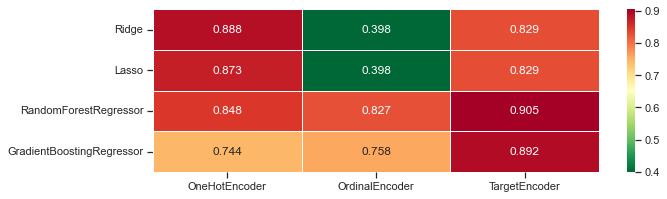

In [9]:
solution.plot_2_2(X, y)

#### Answer 2.3: Interpretation (2p)

In [10]:
mc23 = {'A': "The best performance with one-hot-encoders is seen with linear models, since they can learn complex functions in the high-dimensional space created by one-hot-encoders.",
        'B': "The linear models work well, no matter the encoding.",
        'C': "The linear models do not work well with ordinal encoding, since linear models will assume that the ordering implies a meaningful distance between categories.",
        'D': "The best performance is seen with RandomForests and Gradient Boosting",
        'E': "Decision-tree based ensembles work well with ordinal encodings (better than linear models), since they can build sub-trees for each individual encoder value.",
        'F': "Decision-tree based ensembles do not work well with ordinal encodings, because the ordering is meaningless in this case.",
        'G': "Decision-tree based ensembles work well with ordinal encodings, because they can make good use of the ordering of the categories.",
        'H': "Decision-tree based ensembles can handle different kinds of encodings rather well.",
        'I': "Target encoding works generally well because it captures key information in one or a few features without significantly increasing the dimensionality of the data, like one-hot encoders do.",
        'J': "Target encoding doesn't work well for regression problems since it only creates one new feature.",
        'K': "Target encoding does not work well here, likely because the categorical features are quite skewed, with only a few examples of some categories.",
        'L': "No answer"
    }

In [11]:
for a in solution.q_2_3.split(","):
    if a in mc23:
        print(a,":",mc23[a])
    else:
        print("Invalid response!")

A : The best performance with one-hot-encoders is seen with linear models, since they can learn complex functions in the high-dimensional space created by one-hot-encoders.
C : The linear models do not work well with ordinal encoding, since linear models will assume that the ordering implies a meaningful distance between categories.
D : The best performance is seen with RandomForests and Gradient Boosting
E : Decision-tree based ensembles work well with ordinal encodings (better than linear models), since they can build sub-trees for each individual encoder value.
H : Decision-tree based ensembles can handle different kinds of encodings rather well.
I : Target encoding works generally well because it captures key information in one or a few features without significantly increasing the dimensionality of the data, like one-hot encoders do.


#### Answer 2.4: Categorical Feature Embeddings (6p)

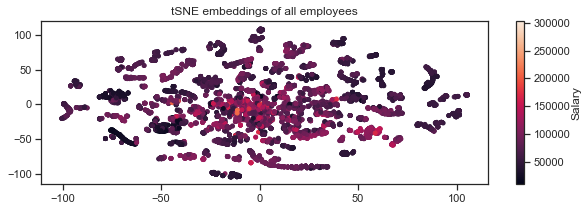

In [12]:
X_embed = solution.create_embeddings(X, y)
X_embed_reduced = solution.compute_tsne(X_embed)
solution.plot_tsne(X_embed_reduced, y)

In [13]:
mc24 = {'A': "Some groups of employees clearly clusters together",
        'B': "The result is entirely random because the embedding doesn't manage to preserve the information in the original data.",
        'C': "Some groups of employees with a high salary cluster together",
        'D': "Some groups of employees with a low salary cluster together",
        'E': "The clusters are all clearly delineated",
        'F': "No answer"
       }

In [14]:
for a in solution.q_2_4.split(","):
    if a in mc24:
        print(a,":",mc24[a])
    else:
        print("Invalid response!")

A : Some groups of employees clearly clusters together
D : Some groups of employees with a low salary cluster together


#### Answer 2.5: Compare again (2p)

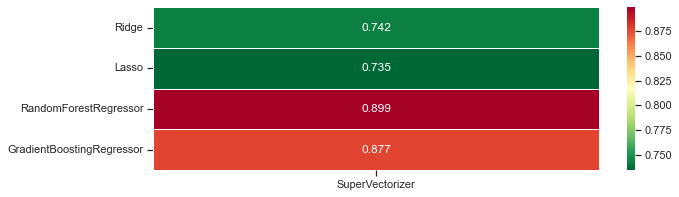

In [15]:
solution.plot_2_5(X,y)

In [16]:
mc25 = {'A': "We get the best results so far, especially with the random forests and gradient boosting.",
        'B': "The results are about the same as the one-hot-encoder we saw in question 2.2.",
        'C': "The learned embeddings seems useful to capture information about which categories are similar (e.g. which employee positions are similar). ",
        'D': "Embeddings don't work well for decision-tree based models, one-hot encoding works much better.",
        'E': "No answer"
       }

In [17]:
for a in solution.q_2_5.split(","):
    if a in mc25:
        print(a,":",mc25[a])
    else:
        print("Invalid response!")

C : The learned embeddings seems useful to capture information about which categories are similar (e.g. which employee positions are similar). 


#### Answer 3.1: Model-based feature importance (4p)

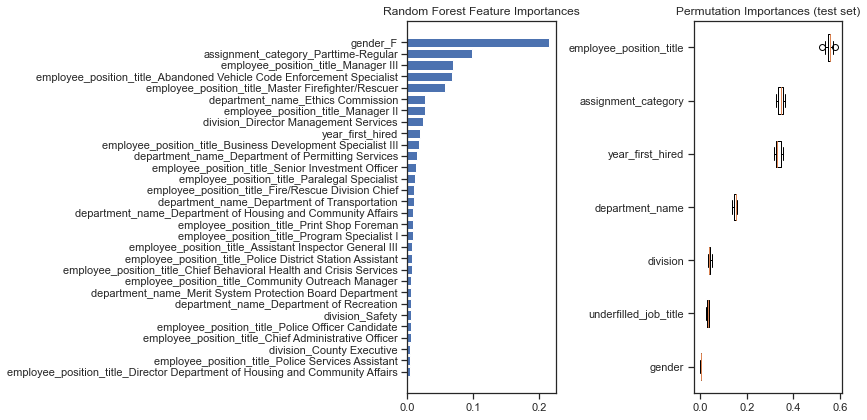

In [18]:
solution.plot_3_1(X,y)

#### Answer 3.2: Interpretation (2p)

In [19]:
mc32 = {'A': "The exact ranking differs a bit because, due to the one-hot-encoding, we get an importance per category in the the model-based feature importances.",
        'B': "Overall, the results are quite similar. The year of first hire, assignment category (fulltime/parttime), and the position title have the most influence on salary.",
        'C': "There are some key differences. Some of the most important features in one method are the least important in the other.",
        'D': "Only some job categories (employee positions) affect salary greatly (e.g. manager)",
        'E': "Gender only shows up in the permutation importances, and with a very low importance.",
        'F': "Gender is important according to both methods.",
        'H': "Year of first hire is not important according to both methods.",
        'G': "Year of first hire is very important according to one method, yet not at all important by the other.",
        'I': "Year of first hire is important according to both methods.",
        'J': "No answer"
       }

In [20]:
for a in solution.q_3_2.split(","):
    if a in mc32:
        print(a,":",mc32[a])
    else:
        print("Invalid response!")

A : The exact ranking differs a bit because, due to the one-hot-encoding, we get an importance per category in the the model-based feature importances.
C : There are some key differences. Some of the most important features in one method are the least important in the other.
D : Only some job categories (employee positions) affect salary greatly (e.g. manager)
I : Year of first hire is important according to both methods.


#### Answer 4.1: Gender bias (3p)

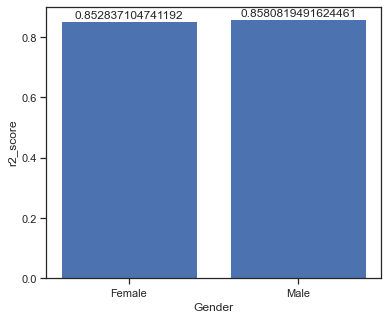

In [21]:
solution.plot_4_1(X,y)

In [22]:
mc41 = {'A': "The model is much more accurate (more than 1% accuracy difference) in predicting the salaries for males than for females.",
        'B': "The model is about equally accurate for both males and females.",
        'C': "Salaries are equal for both genders.",
        'D': "The model doesn't seem to be biased.",
        'E': "The model is clearly biased.",
        'F': "No answer"
       }

In [23]:
for a in solution.q_4_1.split(","):
    if a in mc41:
        print(a,":",mc41[a])
    else:
        print("Invalid response!")

B : The model is about equally accurate for both males and females.
D : The model doesn't seem to be biased.


#### Answer 4.2: Instance reweighting (3p)

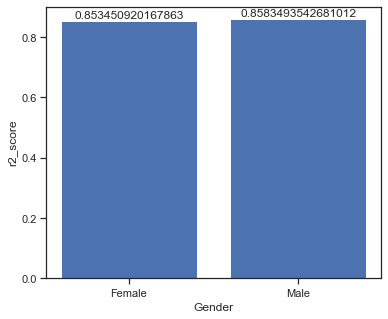

In [24]:
solution.plot_4_2(X,y)

In [25]:
mc42 = {'A': "The model is now much better at predicting the salaries of females.",
        'B': "The model is now much worse at predicting the salaries of females.",
        'C': "The model is only marginally better at predicting the salaries of females than before.",
        'D': "Salaries are now equal for both genders.",
        'E': "The unbalance between males and females was not so large, and the model was already quite good, so the instance weighting didn't do much.",
        'F': "The model still is clearly biased.",
        'G': "No answer"
       }

In [26]:
for a in solution.q_4_2.split(","):
    if a in mc42:
        print(a,":",mc42[a])
    else:
        print("Invalid response!")

C : The model is only marginally better at predicting the salaries of females than before.
E : The unbalance between males and females was not so large, and the model was already quite good, so the instance weighting didn't do much.


In [27]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

Running time: 593.37 seconds
Last modified: March 28, 2022
scikit-learn version: 1.0.2
